In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv('HousingData.csv')

In [110]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [111]:
X = df.iloc[:,:-1].copy()

In [112]:
y=df.iloc[:,-1].copy()

In [113]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


In [114]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [115]:
X.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64

In [116]:
y.isna().sum()

0

In [117]:
corr=X.corrwith(y).sort_values(ascending=False)

In [118]:
print(corr)

RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
dtype: float64


<Axes: ylabel='Frequency'>

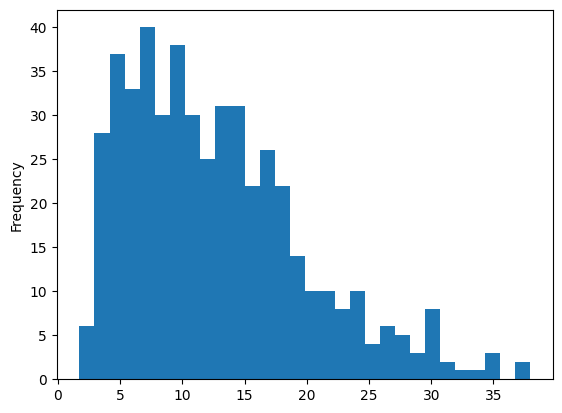

In [119]:
X['LSTAT'].plot(kind='hist',bins=30)

In [120]:
X['LSTAT_cat']=pd.cut(X['LSTAT'],bins=[0,5,10,15,25,np.inf],
      labels=['0-5','5-10','10-15','15-25','25 above'])

In [121]:
X['LSTAT_cat'].value_counts()/X.shape[0]

LSTAT_cat
5-10        0.292490
15-25       0.243083
10-15       0.241107
0-5         0.116601
25 above    0.067194
Name: count, dtype: float64

<Axes: >

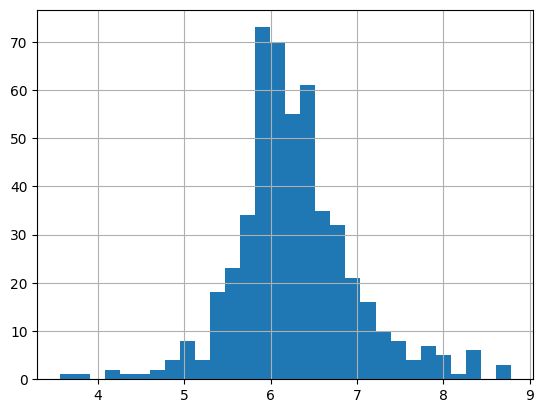

In [122]:
X['RM'].hist(bins=30)

In [123]:
X['RM_cat']=pd.cut(X['RM'],bins=[0,5,5.5,6.5,7.5,np.inf],
      labels=['0-5','5-5.5','5.5-6.5','6.5-7.5','above 7.5'])

In [124]:
X['RM_cat'].value_counts()/X.shape[0]

RM_cat
5.5-6.5      0.616601
6.5-7.5      0.247036
above 7.5    0.053360
5-5.5        0.051383
0-5          0.031621
Name: count, dtype: float64

In [125]:
from sklearn.model_selection import StratifiedShuffleSplit

In [126]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=123)

In [127]:
(train_idxs,test_idxs),=split.split(X,X[['RM_cat']])

In [128]:
X_train,X_test,y_train,y_test=X.iloc[train_idxs],X.iloc[test_idxs],y.iloc[train_idxs],y.iloc[test_idxs]

In [129]:
for col in ['LSTAT_cat','RM_cat']:
    X_train.drop(col,axis=1,inplace=True)
    X_test.drop(col,axis=1,inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25168\2951234862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(col,axis=1,inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25168\2951234862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(col,axis=1,inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25168\2951234862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(col,axis=1,inpl

In [130]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98
87,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3,247,18.5,395.15,NaN
330,0.04544,NaN,3.24,0.0,0.460,6.144,32.2,5.8736,4,430,16.9,368.57,9.09
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4,437,21.2,262.76,17.31


    Steps to ML project

    GET DATA
    EDA
    Prepare data for ML algorithm
    Select and Train model
    Evaluate Parameter Tuning
    Deploy and consume
    Maintain and update

    Preprocessing
    1. Scalling
        - Standard Scalling (Normalization)
        - min-max Scalling
    2. NA values
    3. Feature Selection (Drop useless cols)
    4. Deal with text or categorical data
    5. Feature Engineering
    

In [131]:
data=np.random.normal(140,20,1000) # + np.random.random(1000)*250

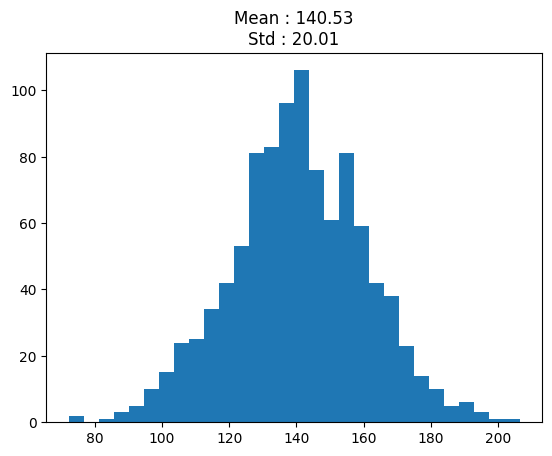

In [132]:
plt.hist(data,bins=30)
plt.title(f'Mean : {data.mean():.2f}\nStd : {data.std():.2f}')
plt.show()

$$ \text {Normalized} X_i = \frac {X-\bar X} {\sigma_X} $$

In [133]:
def standard_normal_form(X):
    norm=(X-X.mean())/X.std()
    return norm

In [134]:
norm_data=standard_normal_form(data)

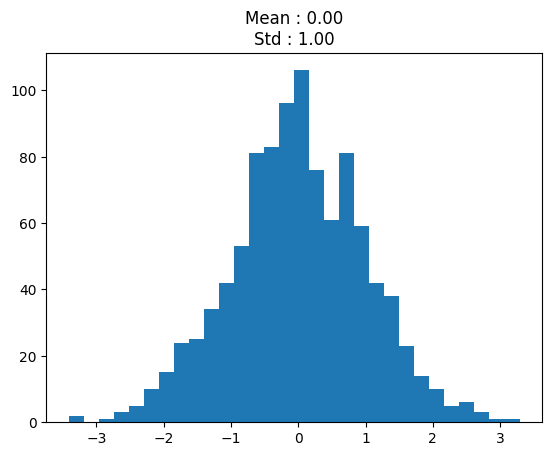

In [135]:
plt.hist(norm_data,bins=30)
plt.title(f'Mean : {norm_data.mean():.2f}\nStd : {norm_data.std():.2f}')
plt.show()

In [136]:
data_root_dir="C:\\Users\\KIIT\\Desktop\\AI_ML"

In [137]:
import os
data_path=os.path.join(data_root_dir,'datasets\housing\housing.csv')

In [156]:
housing=pd.read_csv(data_path)

In [159]:
housing.dropna(inplace=True)

In [160]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [162]:
X_num=housing.drop(['median_house_value','ocean_proximity'],axis=1).copy()

In [163]:
X_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [164]:
X_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scale=StandardScaler()

In [167]:
scale.fit(X_num)
# Learning -> mean, var

StandardScaler()

In [168]:
scale.mean_

array([-119.57068859,   35.63322126,   28.63309353, 2636.50423335,
        537.87055254, 1424.94694856,  499.43346547,    3.8711616 ])

In [169]:
scale.var_

array([4.01412790e+00, 4.56375799e+00, 1.58545799e+02, 4.77516937e+06,
       1.77556687e+05, 1.28409863e+06, 1.46145545e+05, 3.60713071e+00])

In [170]:
X_num_scale=scale.transform(X_num)
# transform function helps in scalling each col

In [171]:
X_num_scale

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97331952,
        -0.97683327,  2.34516291],
       [-1.32232256,  1.04235526, -0.60621017, ...,  0.86133924,
         1.67037262,  2.33263161],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.81976943,
        -0.84342665,  1.78293943],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.36882637,
        -0.17377773, -1.14317103],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.60356386,
        -0.39350628, -1.05513604],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.03348711,
         0.07995643, -0.78060586]])

In [172]:
X_num_scale=pd.DataFrame(X_num_scale,columns=X_num.columns)

In [173]:
X_num_scale.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143


In [174]:
y=housing['median_house_value']

In [175]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [176]:
model=SGDRegressor()
model.fit(X_num,y) # without scale
y_hat=model.predict(X_num)
print("Accuracy : ",r2_score(y,y_hat))

Accuracy :  -8.953542021506661e+20


In [177]:
model=SGDRegressor()
model.fit(X_num_scale,y) # without scale
y_hat=model.predict(X_num_scale)
print("Accuracy : ",r2_score(y,y_hat))

Accuracy :  0.636678432338508


### Algorithm

pipeline building

    One Hot Encoding

    LabelEncoding

    Imputer -> missing values

    X -> [ imputer -> column_add -> column_drop -> Scaler -> Model ] -> model